In [ ]:
#Q3 Pretrained_moremoredata

In [1]:
pip install matplotlib

In [2]:
#installing libraries

In [3]:
pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 877.7/877.7 kB 32.6 MB/s eta 0:00:00


In [4]:
!apt-get update
!apt-get install -y libgl1-mesa-glx



0% [Working]
            
Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [1,091 kB]
Get:4 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Hit:5 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Hit:7 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Ign:8 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Get:10 https://r2u.stat.illinois.edu/ubuntu jammy Release [5,713 B]
Hit:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:12 https://r2u.stat.illinois.edu/ubuntu jammy Release.gpg [793 B]
Get:13 http://security.ubuntu.com/ubuntu jammy-se

In [5]:
!conda install -c conda-forge libgl1-mesa-glx

/bin/bash: line 1: conda: command not found


In [6]:
!pip uninstall opencv-python opencv-python-headless opencv-contrib-python -y

Found existing installation: opencv-python 4.10.0.84
Uninstalling opencv-python-4.10.0.84:
  Successfully uninstalled opencv-python-4.10.0.84
Found existing installation: opencv-python-headless 4.10.0.84
Uninstalling opencv-python-headless-4.10.0.84:
  Successfully uninstalled opencv-python-headless-4.10.0.84
Found existing installation: opencv-contrib-python 4.10.0.84
Uninstalling opencv-contrib-python-4.10.0.84:
  Successfully uninstalled opencv-contrib-python-4.10.0.84


In [7]:
!pip install opencv-python-headless

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 41.8 MB/s eta 0:00:00


In [ ]:
import cv2
print(cv2.__version__)
import os
import matplotlib.pyplot as plt

4.10.0


In [ ]:
from google.colab import drive
import zipfile
import os

# Mounting Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Defining the location of the zip file in Google Drive
zip_file_path = '/content/drive/MyDrive/DP_Q3/train.zip'

# Specifying the extraction path to be DP_Q3
extract_folder_path = os.path.dirname(zip_file_path)

# Unzipping
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_folder_path)

print(f"Unzipped to: {extract_folder_path}")

Unzipped to: /content/drive/MyDrive/DP_Q3


In [ ]:
# Defining the location of the zip file in Google Drive
zip_file_path = '/content/drive/MyDrive/DP_Q3/test.zip'

# Specifying the extraction path to be DP_Q3
extract_folder_path = os.path.dirname(zip_file_path)

# Unzipping
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_folder_path)

print(f"Unzipped to: {extract_folder_path}")

Unzipped to: /content/drive/MyDrive/DP_Q3


In [ ]:
# Defining the location of the zip file in Google Drive
zip_file_path = '/content/drive/MyDrive/DP_Q3/valid.zip'

# Specifying the extraction path to be DP_Q3
extract_folder_path = os.path.dirname(zip_file_path)

# Unzipping
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_folder_path)

print(f"Unzipped to: {extract_folder_path}")

Unzipped to: /content/drive/MyDrive/DP_Q3


In [ ]:
# Defining the folder path in Google Drive
folder_path = '/content/drive/MyDrive/DP_Q3/train/images'

# Counting the files in the folder
file_count = len([name for name in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, name))])

print(f"Number of files in '{folder_path}': {file_count}")

Number of files in '/content/drive/MyDrive/DP_Q3/train/images': 5594


In [ ]:
from ultralytics import YOLO
model = YOLO('yolov8x.pt') # Building model using yolov8x pretrained model

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 131M/131M [00:00<00:00, 321MB/s]


In [ ]:
model.train(
    data='/content/drive/MyDrive/DP_Q3/data_aug.yaml',
    epochs=30,
    lr0=0.001,
    batch=32,
    workers=2,
    pretrained=True,
    optimizer='AdamW',
    imgsz=640,            
    mosaic=1.0,           
    mixup=0.2,           
)

Ultralytics 8.3.23 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
engine/trainer: task=detect, mode=train, model=yolov8x.pt, data=/content/drive/MyDrive/DP_Q3/data_aug.yaml, epochs=30, time=None, patience=100, batch=32, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=2, project=None, name=train, exist_ok=False, pretrained=True, optimizer=AdamW, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=Tr

100%|██████████| 755k/755k [00:00<00:00, 13.8MB/s]


Overriding model.yaml nc=80 with nc=25

                   from  n    params  module                                       arguments                     
  0                  -1  1      2320  ultralytics.nn.modules.conv.Conv             [3, 80, 3, 2]                 
  1                  -1  1    115520  ultralytics.nn.modules.conv.Conv             [80, 160, 3, 2]               
  2                  -1  3    436800  ultralytics.nn.modules.block.C2f             [160, 160, 3, True]           
  3                  -1  1    461440  ultralytics.nn.modules.conv.Conv             [160, 320, 3, 2]              
  4                  -1  6   3281920  ultralytics.nn.modules.block.C2f             [320, 320, 6, True]           
  5                  -1  1   1844480  ultralytics.nn.modules.conv.Conv             [320, 640, 3, 2]              
  6                  -1  6  13117440  ultralytics.nn.modules.block.C2f             [640, 640, 6, True]           
  7                  -1  1   3687680  ultralytic

100%|██████████| 5.35M/5.35M [00:00<00:00, 7.01MB/s]


AMP: checks passed ✅


train: Scanning /content/drive/MyDrive/DP_Q3/train/labels... 5594 images, 13 backgrounds, 0 corrupt: 100%|██████████| 5594/5594 [01:17<00:00, 72.18it/s] 


train: New cache created: /content/drive/MyDrive/DP_Q3/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:13: UserWarning: A new version of Albumentations is available: 1.4.20 (you have 1.4.15). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /content/drive/MyDrive/DP_Q3/valid/labels... 641 images, 1 backgrounds, 0 corrupt: 100%|██████████| 641/641 [00:05<00:00, 127.27it/s]


val: New cache created: /content/drive/MyDrive/DP_Q3/valid/labels.cache
Plotting labels to runs/detect/train/labels.jpg... 
optimizer: AdamW(lr=0.001, momentum=0.937) with parameter groups 97 weight(decay=0.0), 104 weight(decay=0.0005), 103 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/30      24.9G     0.9942       2.19      1.392         75        640: 100%|██████████| 175/175 [01:15<00:00,  2.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:06<00:00,  1.81it/s]


                   all        641        819      0.301      0.458      0.322      0.218

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/30      24.8G      1.014      1.765      1.389         77        640: 100%|██████████| 175/175 [01:13<00:00,  2.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.41it/s]

                   all        641        819      0.666      0.512      0.544      0.371



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/30      25.1G     0.9502      1.512      1.335        108        640: 100%|██████████| 175/175 [01:11<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.53it/s]

                   all        641        819      0.598      0.584      0.587      0.447



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/30      24.8G     0.9157      1.369       1.31         66        640: 100%|██████████| 175/175 [01:11<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.56it/s]

                   all        641        819      0.701      0.749      0.797      0.623



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/30      25.1G     0.8669       1.23      1.271         64        640: 100%|██████████| 175/175 [01:11<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.47it/s]

                   all        641        819      0.731      0.765      0.826      0.655



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/30      24.8G     0.8555      1.146      1.255         71        640: 100%|██████████| 175/175 [01:12<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.47it/s]

                   all        641        819       0.82      0.719      0.815      0.636



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/30      25.1G     0.8255      1.073      1.236        101        640: 100%|██████████| 175/175 [01:11<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.47it/s]

                   all        641        819      0.832      0.839      0.897      0.725



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/30      24.7G     0.8131      1.014      1.224         84        640: 100%|██████████| 175/175 [01:11<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.58it/s]

                   all        641        819      0.794      0.796      0.866      0.691



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/30      25.1G     0.7979     0.9594       1.22         86        640: 100%|██████████| 175/175 [01:11<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.57it/s]

                   all        641        819      0.861      0.839      0.905      0.723



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/30      24.7G     0.7709     0.9019      1.201         64        640: 100%|██████████| 175/175 [01:11<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.51it/s]

                   all        641        819      0.892      0.864      0.929      0.755



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/30      25.1G     0.7688     0.8799      1.192         76        640: 100%|██████████| 175/175 [01:10<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.58it/s]

                   all        641        819      0.897      0.894      0.927      0.756



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/30      24.7G     0.7541     0.8532      1.176         75        640: 100%|██████████| 175/175 [01:12<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.56it/s]

                   all        641        819      0.914      0.893      0.934      0.764



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/30      25.1G     0.7417     0.8169      1.172         89        640: 100%|██████████| 175/175 [01:12<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.55it/s]

                   all        641        819      0.919      0.886      0.942      0.776



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/30      24.8G     0.7352     0.7983      1.168         71        640: 100%|██████████| 175/175 [01:11<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.48it/s]

                   all        641        819       0.91      0.892      0.945      0.778



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/30      25.1G     0.7219     0.7716       1.16         61        640: 100%|██████████| 175/175 [01:12<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.47it/s]

                   all        641        819      0.915      0.919      0.954      0.784



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/30      24.7G     0.7234      0.763      1.162         56        640: 100%|██████████| 175/175 [01:11<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.53it/s]

                   all        641        819      0.906      0.932      0.953      0.793



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/30      25.1G     0.7083     0.7286      1.152         72        640: 100%|██████████| 175/175 [01:12<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.58it/s]

                   all        641        819      0.926      0.896      0.953      0.791



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/30      24.8G     0.6975       0.71      1.147         89        640: 100%|██████████| 175/175 [01:11<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.54it/s]

                   all        641        819      0.942      0.921      0.969       0.81



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/30      25.1G      0.692     0.6927      1.138         90        640: 100%|██████████| 175/175 [01:11<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.49it/s]

                   all        641        819      0.947      0.926      0.955      0.792



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/30      24.7G      0.684     0.6728      1.132         93        640: 100%|██████████| 175/175 [01:10<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.59it/s]

                   all        641        819      0.943      0.922      0.962      0.802


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/30      25.1G     0.5773     0.3831      1.078         32        640: 100%|██████████| 175/175 [01:11<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.56it/s]

                   all        641        819      0.928      0.925      0.959      0.802



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/30      24.7G      0.568     0.3601      1.069         36        640: 100%|██████████| 175/175 [01:10<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.56it/s]

                   all        641        819      0.926      0.946      0.961      0.802



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/30      25.1G     0.5481     0.3428      1.062         31        640: 100%|██████████| 175/175 [01:10<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.48it/s]

                   all        641        819      0.942      0.926      0.966       0.81



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/30      24.7G     0.5254     0.3183      1.042         32        640: 100%|██████████| 175/175 [01:10<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.55it/s]

                   all        641        819      0.946      0.936      0.962      0.811



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/30        25G     0.5129     0.3056      1.032         36        640: 100%|██████████| 175/175 [01:10<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.59it/s]

                   all        641        819      0.921      0.944      0.958      0.803



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/30      24.7G     0.5008     0.2835      1.024         30        640: 100%|██████████| 175/175 [01:10<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.52it/s]

                   all        641        819      0.935      0.934      0.964      0.816



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/30        25G     0.4885      0.273      1.018         32        640: 100%|██████████| 175/175 [01:11<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.55it/s]

                   all        641        819      0.923       0.95      0.965      0.818



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/30      24.7G     0.4683       0.26      1.001         36        640: 100%|██████████| 175/175 [01:10<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.60it/s]

                   all        641        819      0.944      0.937      0.961      0.815



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/30      25.1G     0.4527     0.2466      0.988         38        640: 100%|██████████| 175/175 [01:10<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.53it/s]

                   all        641        819      0.943      0.947      0.966      0.822



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/30      24.7G     0.4409     0.2387     0.9827         29        640: 100%|██████████| 175/175 [01:11<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.49it/s]

                   all        641        819      0.947      0.939      0.966      0.823



30 epochs completed in 0.655 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 136.8MB
Optimizer stripped from runs/detect/train/weights/best.pt, 136.8MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.23 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
Model summary (fused): 268 layers, 68,147,643 parameters, 0 gradients, 257.5 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  2.15it/s]


                   all        641        819      0.947      0.938      0.966      0.823
-Road narrows on right         15         15          1      0.863       0.98      0.891
     Attention Please-         23         23      0.979          1      0.995      0.892
    Beware of children         23         23      0.963      0.913      0.966       0.88
CYCLE ROUTE AHEAD WARNING         29         29          1      0.966      0.973      0.881
             Crosswalk         42         43       0.91      0.936      0.945      0.732
Dangerous Left Curve Ahead         24         24      0.709      0.712      0.824      0.691
Dangerous Rright Curve Ahead         30         30      0.961      0.814      0.941      0.787
              No Entry         44         45      0.993      0.956      0.991      0.904
        No_Over_Taking         23         23      0.991          1      0.995      0.765
          One way road         27         27      0.906      0.815      0.898      0.774
      Sp

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7df8234fcd30>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,  

In [ ]:
results = model.val()  # Validating model

Ultralytics 8.3.24 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
Model summary (fused): 268 layers, 68,147,643 parameters, 0 gradients, 257.5 GFLOPs


val: Scanning /content/drive/MyDrive/DP_Q3/valid/labels.cache... 641 images, 1 backgrounds, 0 corrupt: 100%|██████████| 641/641 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:09<00:00,  2.30it/s]


                   all        641        819      0.836      0.831      0.897      0.742
-Road narrows on right         15         15      0.986      0.867      0.958      0.865
     Attention Please-         23         23      0.964          1      0.995      0.874
    Beware of children         23         23      0.668      0.826      0.899      0.808
CYCLE ROUTE AHEAD WARNING         29         29      0.982      0.724      0.904      0.778
             Crosswalk         42         43      0.861      0.953      0.913      0.708
Dangerous Left Curve Ahead         24         24      0.439      0.667      0.531      0.444
Dangerous Rright Curve Ahead         30         30      0.545      0.759      0.779      0.658
              No Entry         44         45      0.787      0.978      0.982       0.84
        No_Over_Taking         23         23          1      0.377      0.848      0.584
          One way road         27         27      0.309      0.852      0.832      0.717
      Sp

In [ ]:
# Predicting on test data
predictions = model.predict(source=r'/content/drive/MyDrive/DP_Q3/test', save=True)


image 1/308 /content/drive/MyDrive/DP_Q3/test/00000_00000_00000_png_jpg.rf.fe38518f555b8b4d139ed0a31adee9fc.jpg: 640x640 1 No Entry, 12.3ms
image 2/308 /content/drive/MyDrive/DP_Q3/test/00000_00000_00014_png_jpg.rf.da4d304ccb4fd7555f5c291bed572107.jpg: 640x640 1 Dangerous Rright Curve Ahead, 11.5ms
image 3/308 /content/drive/MyDrive/DP_Q3/test/00000_00000_00018_png_jpg.rf.4eff8cf87317fad6622f1d00b81d575e.jpg: 640x640 1 Dangerous Rright Curve Ahead, 1 Speed limit 20 Kph, 11.4ms
image 4/308 /content/drive/MyDrive/DP_Q3/test/00000_00000_00019_png_jpg.rf.923c0a404dce9e2518dcff1a64cd7e04.jpg: 640x640 1 Dangerous Rright Curve Ahead, 15.2ms
image 5/308 /content/drive/MyDrive/DP_Q3/test/00000_00000_00021_png_jpg.rf.f0f74c580fb71be6df258535e2d301af.jpg: 640x640 1 Dangerous Rright Curve Ahead, 12.0ms
image 6/308 /content/drive/MyDrive/DP_Q3/test/00000_00000_00022_png_jpg.rf.66ace55a624f81aacdd7c0e797a807ed.jpg: 640x640 (no detections), 13.4ms
image 7/308 /content/drive/MyDrive/DP_Q3/test/00000_


image 1/1 /content/drive/MyDrive/DP_Q3/test/00001_00037_00025_png_jpg.rf.1001b596fb6db1f0c696c937ec7ca36e.jpg: 640x640 1 Speed limit 30 Kph, 15.5ms
Speed: 2.8ms preprocess, 15.5ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


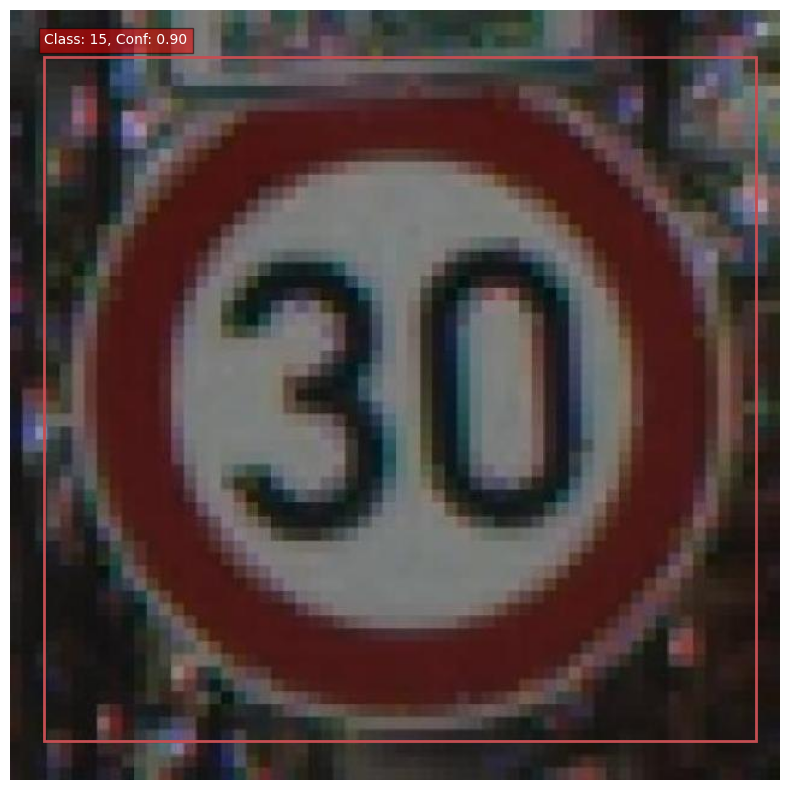


image 1/1 /content/drive/MyDrive/DP_Q3/test/00001_00039_00004_png_jpg.rf.bba62b0c0aae57fd2725f60163e4f393.jpg: 640x640 1 No Entry, 13.0ms
Speed: 1.7ms preprocess, 13.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


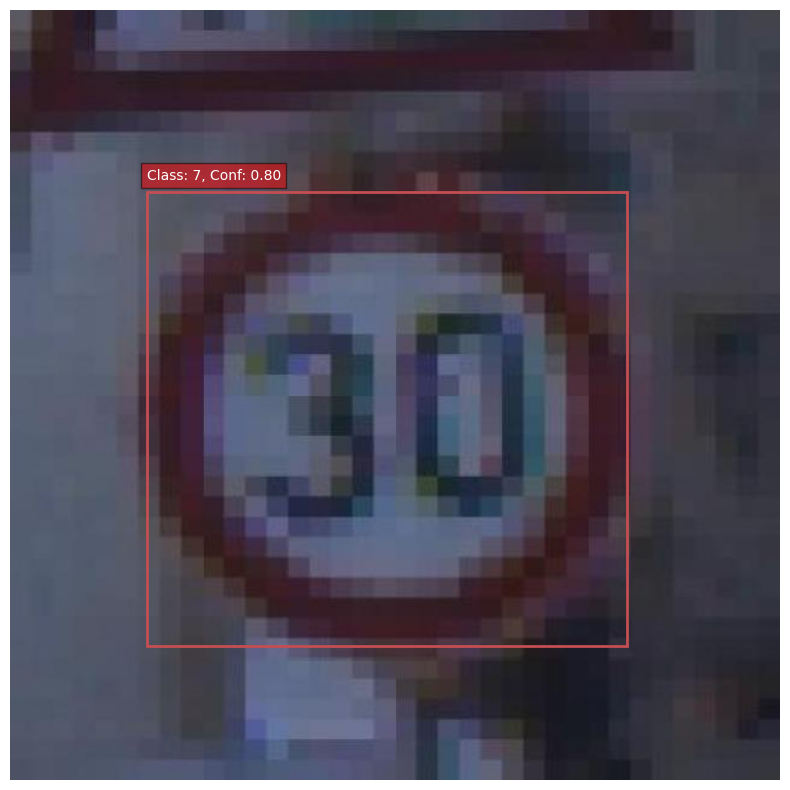


image 1/1 /content/drive/MyDrive/DP_Q3/test/00001_00017_00025_png_jpg.rf.e6855b3207475e09658480d8ff9df0b5.jpg: 640x640 1 Speed limit 30 Kph, 11.9ms
Speed: 1.8ms preprocess, 11.9ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


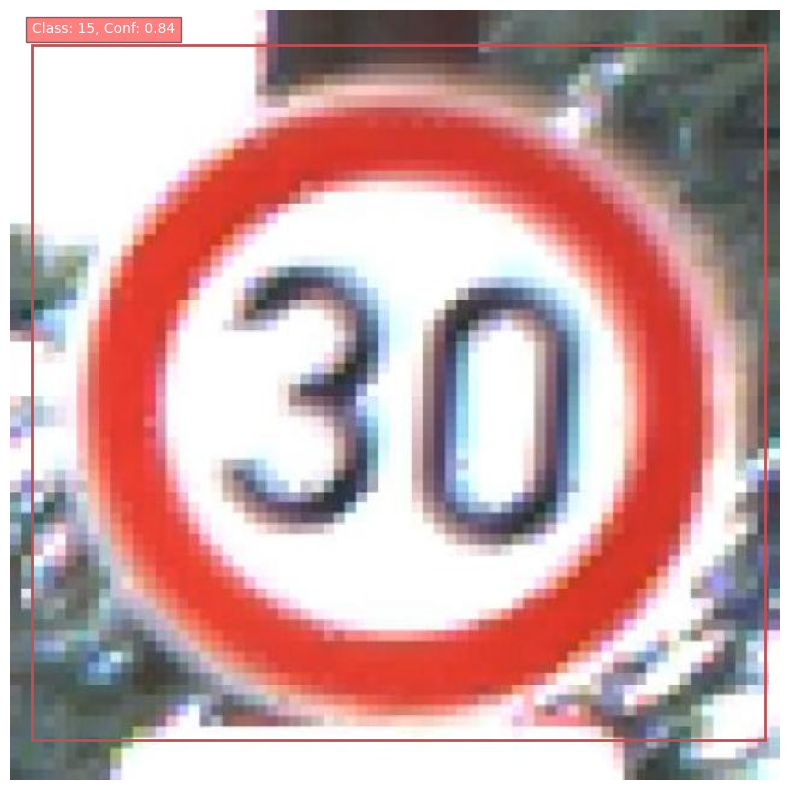


image 1/1 /content/drive/MyDrive/DP_Q3/test/00001_00032_00016_png_jpg.rf.b4b4e66189114a55f95b1664a482734e.jpg: 640x640 1 Speed limit 30 Kph, 12.2ms
Speed: 2.2ms preprocess, 12.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


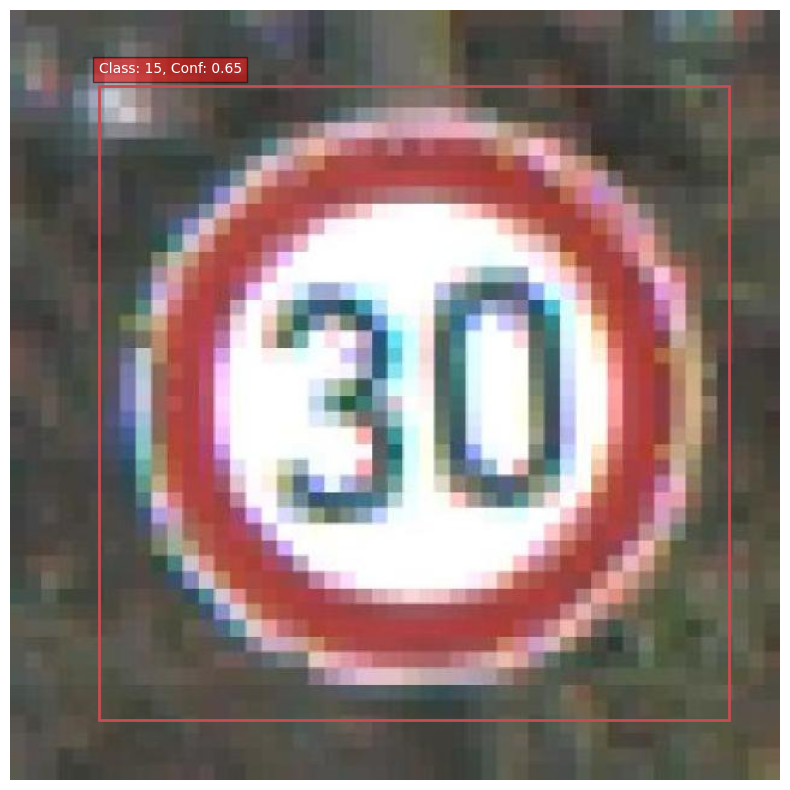


image 1/1 /content/drive/MyDrive/DP_Q3/test/road425_png.rf.4d460fd58840b62a9180f61f10cd784f.jpg: 640x640 1 One way road, 1 Speed limit, 1 Speed limit 80 Kph, 12.6ms
Speed: 2.1ms preprocess, 12.6ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


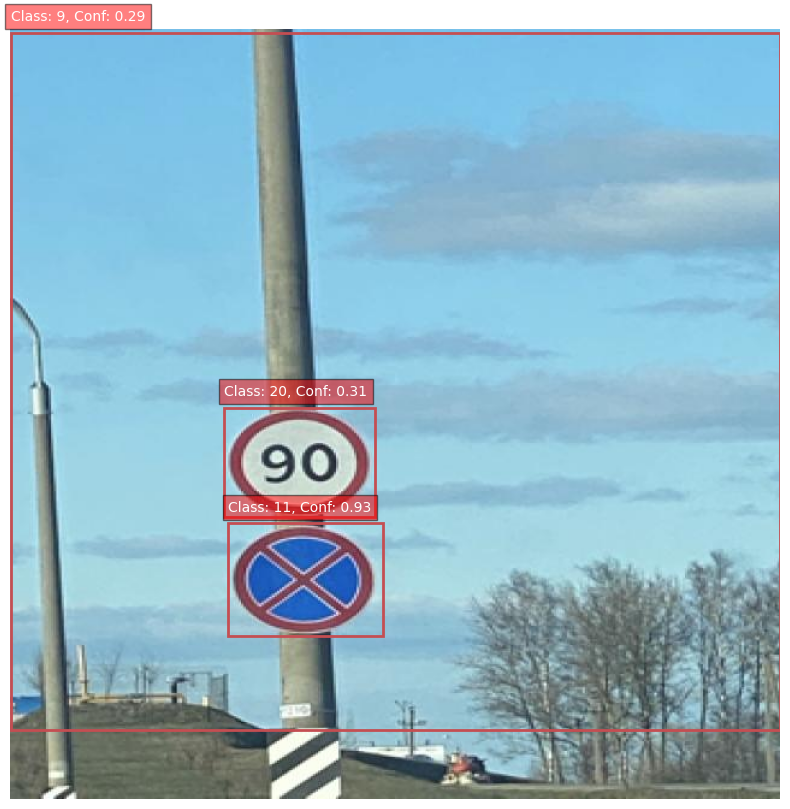

Predicted images saved to: /content/drive/MyDrive/DP_Q3/predicted_images


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
import random
import os

output_dir = r'/content/drive/MyDrive/DP_Q3/predicted_images'
os.makedirs(output_dir, exist_ok=True) 

# Function to visualize, save, and print image with predicted bounding boxes
def visualize_and_save_predictions(image_path, predictions, save_path):

    img = Image.open(image_path)
    plt.figure(figsize=(10, 10))
    plt.imshow(img)
    ax = plt.gca()

    # Iterating through the predictions and drawing the boxes
    for box in predictions.boxes:
        x1, y1, x2, y2 = box.xyxy[0].tolist() 
        conf = box.conf[0].item()  
        cls = int(box.cls[0].item()) 

        # Rectangle patch for the bounding box
        rect = patches.Rectangle((x1, y1), x2 - x1, y2 - y1, linewidth=2, edgecolor='r', facecolor='none')
        ax.add_patch(rect)

        # Annotating the bounding box with class and confidence
        plt.text(x1, y1 - 10, f'Class: {cls}, Conf: {conf:.2f}', color='white', bbox=dict(facecolor='red', alpha=0.5))

    plt.axis('off') 

    # Saving image
    plt.savefig(save_path, bbox_inches='tight', pad_inches=0)
    plt.show()

    plt.close()  

test_image_dir = r'/content/drive/MyDrive/DP_Q3/test'

# Getting a list of all test image filenames
test_image_files = [f for f in os.listdir(test_image_dir) if f.endswith('.jpg')]

# Random test images to visualize, save, and print
num_images_to_visualize = 5
random_image_files = random.sample(test_image_files, num_images_to_visualize)

# Looping through the selected random images, predicting, saving, and printing the visualized images
for image_file in random_image_files:
    image_path = os.path.join(test_image_dir, image_file)
    prediction = model.predict(source=image_path) 
    save_path = os.path.join(output_dir, f"predicted_{image_file}") 
    visualize_and_save_predictions(image_path, prediction[0], save_path) 

print(f"Predicted images saved to: {output_dir}")

In [ ]:
import csv
#bounding boxes coordinates
output_csv_path = "/content/drive/MyDrive/DP_Q3/bounding_boxes.csv"

# Using CSV file for writing
with open(output_csv_path, mode='w', newline='') as csv_file:
    writer = csv.writer(csv_file)
    writer.writerow(['image_id', 'x1', 'y1', 'x2', 'y2', 'class', 'confidence'])

    # Looping over each test image
    for image_file in test_image_files:
        image_path = os.path.join(test_image_dir, image_file)
        predictions = model.predict(source=image_path)

        # Extracting bounding box information for each prediction
        for box in predictions[0].boxes:
            x1, y1, x2, y2 = box.xyxy[0].tolist() 
            conf = box.conf[0].item() 
            cls = int(box.cls[0].item()) 

            writer.writerow([image_file, x1, y1, x2, y2, cls, conf])

print(f"CSV file with bounding box coordinates saved to: {output_csv_path}")


image 1/1 /content/drive/MyDrive/DP_Q3/test/00000_00000_00000_png_jpg.rf.fe38518f555b8b4d139ed0a31adee9fc.jpg: 640x640 1 No Entry, 18.7ms
Speed: 2.3ms preprocess, 18.7ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/drive/MyDrive/DP_Q3/test/00000_00000_00014_png_jpg.rf.da4d304ccb4fd7555f5c291bed572107.jpg: 640x640 1 Dangerous Rright Curve Ahead, 12.0ms
Speed: 1.7ms preprocess, 12.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/drive/MyDrive/DP_Q3/test/00000_00000_00018_png_jpg.rf.4eff8cf87317fad6622f1d00b81d575e.jpg: 640x640 1 Dangerous Rright Curve Ahead, 1 Speed limit 20 Kph, 12.2ms
Speed: 1.6ms preprocess, 12.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/drive/MyDrive/DP_Q3/test/00000_00000_00019_png_jpg.rf.923c0a404dce9e2518dcff1a64cd7e04.jpg: 640x640 1 Dangerous Rright Curve Ahead, 11.8ms
Speed: 1.6ms preprocess, 11.8ms inference, 1.4ms postprocess per image 

In [ ]:
import csv
import os

#creating submission file which contains the predicted class information
test_image_dir = r'/content/drive/MyDrive/DP_Q3/test'

# CSV file for saving predictions
output_csv = r'/content/drive/MyDrive/DP_Q3/submission_m2.csv'

# CSV file for writing
with open(output_csv, mode='w', newline='') as file:
    writer = csv.writer(file)

    # Writing the header
    writer.writerow(['filename', 'class'])

    # Looping through all the test images
    for image_name in os.listdir(test_image_dir):
        image_path = os.path.join(test_image_dir, image_name)
        predictions = model.predict(source=image_path)
        class_names = set()

        # Extracting the predicted classes for the image
        for box in predictions[0].boxes:
            cls = int(box.cls[0].item())

            class_name = model.names[cls] 
            class_names.add(class_name) 

        class_names_list = ', '.join(class_names)
        writer.writerow([image_name, class_names_list])

print(f"Predictions saved to {output_csv}")



image 1/1 /content/drive/MyDrive/DP_Q3/test/00000_00000_00000_png_jpg.rf.fe38518f555b8b4d139ed0a31adee9fc.jpg: 640x640 1 Dangerous Rright Curve Ahead, 13.1ms
Speed: 1.9ms preprocess, 13.1ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/drive/MyDrive/DP_Q3/test/00000_00000_00014_png_jpg.rf.da4d304ccb4fd7555f5c291bed572107.jpg: 640x640 1 Speed limit 20 Kph, 11.9ms
Speed: 1.5ms preprocess, 11.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/drive/MyDrive/DP_Q3/test/00000_00000_00018_png_jpg.rf.4eff8cf87317fad6622f1d00b81d575e.jpg: 640x640 1 Speed limit 20 Kph, 11.4ms
Speed: 1.4ms preprocess, 11.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/drive/MyDrive/DP_Q3/test/00000_00000_00019_png_jpg.rf.923c0a404dce9e2518dcff1a64cd7e04.jpg: 640x640 1 Speed limit 20 Kph, 14.2ms
Speed: 1.4ms preprocess, 14.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

image

In [ ]:
#IOU calculation

In [ ]:
import os
from ultralytics import YOLO
#using the bounding boxes, finding the IoU score or this model
# Paths to validation images and labels
val_image_dir = r'/content/drive/MyDrive/DP_Q3/valid/images'
val_label_dir = r'/content/drive/MyDrive/DP_Q3/valid/labels'

# Converting YOLO format to standard box format
def yolo_to_xyxy(box, img_width, img_height):
    x_center, y_center, width, height = box
    x1 = (x_center - width / 2) * img_width
    y1 = (y_center - height / 2) * img_height
    x2 = (x_center + width / 2) * img_width
    y2 = (y_center + height / 2) * img_height
    return [x1, y1, x2, y2]

# IoU calculation function
def calculate_iou(boxA, boxB):
    xA = max(boxA[0], boxB[0])
    yA = max(boxA[1], boxB[1])
    xB = min(boxA[2], boxB[2])
    yB = min(boxA[3], boxB[3])

    interArea = max(0, xB - xA) * max(0, yB - yA)
    boxAArea = (boxA[2] - boxA[0]) * (boxA[3] - boxA[1])
    boxBArea = (boxB[2] - boxB[0]) * (boxB[3] - boxB[1])

    iou = interArea / float(boxAArea + boxBArea - interArea)
    return iou

# Calculating IoU for each validation image
total_iou = 0
num_boxes = 0

for image_name in os.listdir(val_image_dir):
    image_path = os.path.join(val_image_dir, image_name)
    label_path = os.path.join(val_label_dir, os.path.splitext(image_name)[0] + '.txt')
    img = Image.open(image_path)
    img_width, img_height = img.size

    # Loading ground truth boxes from label file
    ground_truth_boxes = []
    with open(label_path, 'r') as f:
        for line in f:
            class_id, x_center, y_center, width, height = map(float, line.strip().split())
            ground_truth_boxes.append(yolo_to_xyxy([x_center, y_center, width, height], img_width, img_height))

    # Predicting boxes using YOLO
    yolo_predictions = model.predict(source=image_path)[0]

    # Calculating IoU for each prediction
    for pred_box in yolo_predictions.boxes:
        pred_coords = pred_box.xyxy[0].tolist()
        pred_box_coords = [int(pred_coords[0]), int(pred_coords[1]), int(pred_coords[2]), int(pred_coords[3])]

        # Calculating IoU with each ground truth box
        for gt_box in ground_truth_boxes:
            iou = calculate_iou(pred_box_coords, gt_box)
            total_iou += iou
            num_boxes += 1

# Calculating and printing average IoU
average_iou = total_iou / num_boxes if num_boxes > 0 else 0
print(f"Average IoU over validation set: {average_iou:.4f}")



image 1/1 /content/drive/MyDrive/DP_Q3/valid/images/00000_00000_00018_png_jpg.rf.f707cbdaf4d44b31e41ee7d604b558de.jpg: 640x640 1 Dangerous Rright Curve Ahead, 1 Speed limit 20 Kph, 13.6ms
Speed: 2.1ms preprocess, 13.6ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/drive/MyDrive/DP_Q3/valid/images/00000_00000_00019_png_jpg.rf.0caa91836417583be08013d5f095bcdc.jpg: 640x640 1 Dangerous Rright Curve Ahead, 11.9ms
Speed: 1.5ms preprocess, 11.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/drive/MyDrive/DP_Q3/valid/images/00000_00000_00021_png_jpg.rf.76273d6def41e680b11585baf2c5060f.jpg: 640x640 1 Dangerous Rright Curve Ahead, 11.5ms
Speed: 1.4ms preprocess, 11.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/drive/MyDrive/DP_Q3/valid/images/00000_00000_00022_png_jpg.rf.6747813c922976c163aa5f9881eed31b.jpg: 640x640 (no detections), 11.7ms
Speed: 1.4ms preprocess, 11.7ms in

In [23]:
print(f"Average IoU over validation set: {average_iou:.4f}")

Average IoU over validation set: 0.7502


In [ ]:
#Saving the final model

In [ ]:
# Saving model weights
model.save(r"/content/drive/MyDrive/DP_Q3/yolov8_model2_weights.pt")

Visualizing some plots created and stored in results during the model development

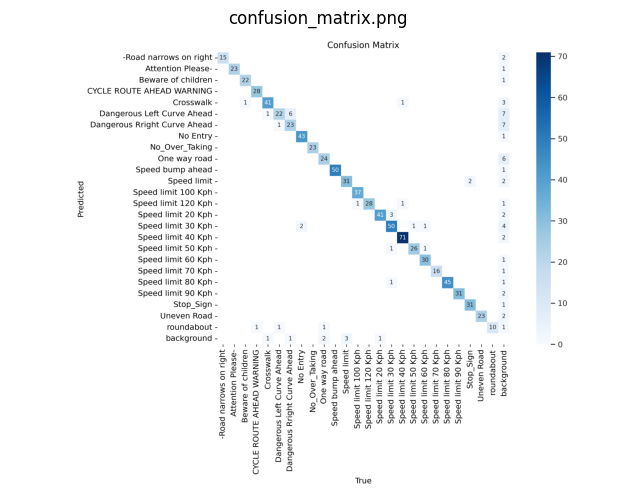

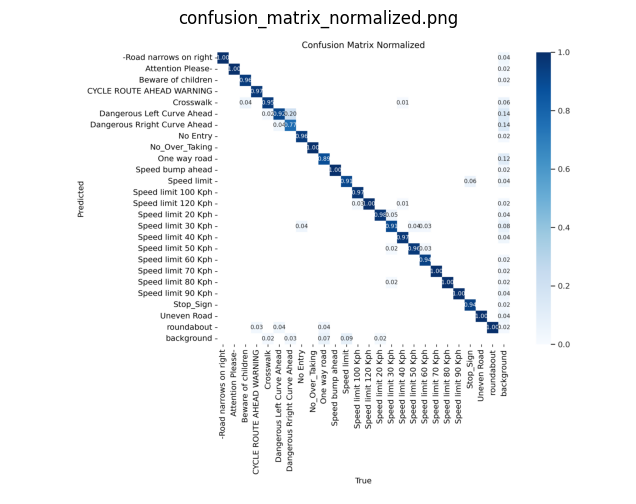

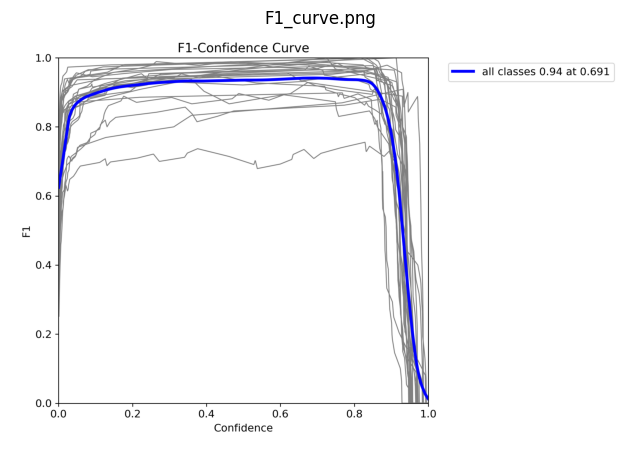

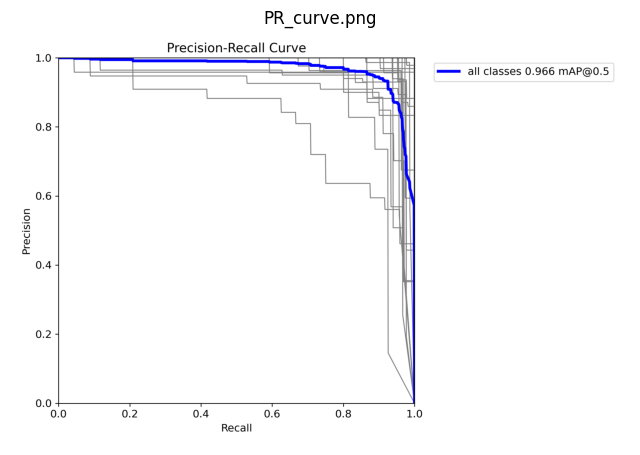

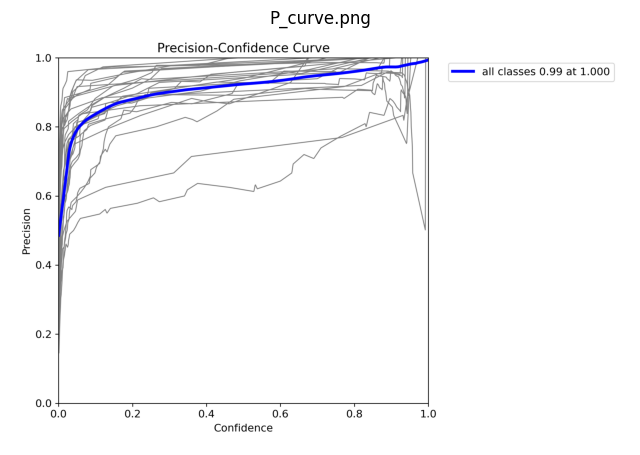

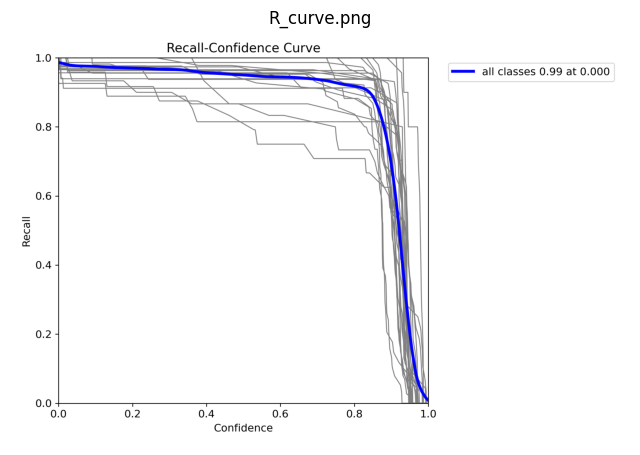

In [ ]:
import os
import matplotlib.pyplot as plt
from PIL import Image

graph_folder = r'/app/Lab/Q3/pretrained_other/FINAL/yolov8/graphs'

# Getting all images
image_files = [f for f in os.listdir(graph_folder) if f.endswith(('.png', '.jpg', '.jpeg'))]

# Looping through each image file and display it
for image_file in image_files:
    img_path = os.path.join(graph_folder, image_file)
    img = Image.open(img_path)
    
    # Displaying the image with matplotlib
    plt.figure(figsize=(8, 6))
    plt.imshow(img)
    plt.axis('off')
    plt.title(image_file)
    plt.show()
